## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_merge = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
mouse_metadata.head()
study_results.head()
mouse_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = mouse_merge['Mouse ID'].nunique()
#merge_groupby =mouse_merge.groupby("Mouse ID")
total_mice


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup= mouse_merge.groupby(["Mouse ID", "Timepoint"])
duplicate_mouse = mouse_merge[mouse_merge.duplicated(['Mouse ID','Timepoint'])]


#g989_count = mouse_merge[mouse_merge["Mouse ID"]=="g989"]
#g989_count

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice =mouse_merge.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_mice2=mouse_merge.drop_duplicates("Mouse ID")
clean_mice.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice2["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stat= clean_mice.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_stat=summary_stat.rename(columns={"mean":"Mean Tumor Volume",
                                         "median": "Median Tumor Volume",
                                         "var": "Tumor Volume Variance",
                                         "std": "Tumor Volume Std.Dev.",
                                         "sem": "Tumor Volume Std. Err."})
summary_stat

Tumor Volume (mm3)                                            \
              Mean Tumor Volume Median Tumor Volume Tumor Volume Variance   
Drug Regimen                                                                
Capomulin             40.675741           41.557809             24.947764   
Ceftamin              52.591172           51.776157             39.290177   
Infubinol             52.884795           51.820584             43.128684   
Ketapril              55.235638           53.698743             68.553577   
Naftisol              54.331565           52.509285             66.173479   
Placebo               54.033581           52.288934             61.168083   
Propriva              52.393463           50.909965             43.138803   
Ramicane              40.216745           40.673236             23.486704   
Stelasyn              54.233149           52.431737             59.450562   
Zoniferol             53.236507           51.818479             48.533355   

                                                           
             Tumor Volume Std.Dev. Tumor Volume Std. Err.  
Drug Regimen                                               
Capomulin                 4.994774               0.329346  
Ceftamin                  6.268188               0.469821  
Infubinol                 6.567243               0.492236  
Ketapril                  8.279709               0.603860  
Naftisol                  8.134708               0.596466  
Placebo                   7.821003               0.581331  
Propriva                  6.568014               0.525862  
Ramicane                  4.846308               0.320955  
Stelasyn                  7.710419               0.573111  
Zoniferol                 6.966589               0.516398

## Bar and Pie Charts

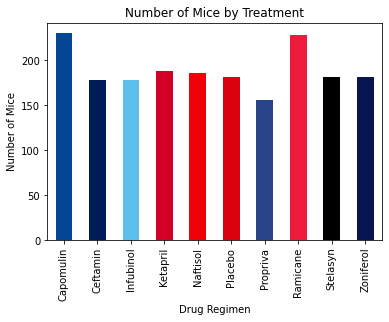

<Figure size 432x288 with 0 Axes>

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. # Filter the DataFrame down only to those columns to chart
drug_colors = ['#034694','#001C58','#5CBFEB','#D00027','#EF0107','#DA020E','#274488','#ED1A3B','#000000','#091453']
mice = clean_mice.groupby('Drug Regimen')
mice_drug = mice['Mouse ID'].count()

mice_drug_chart = mice_drug.plot(kind="bar", title="Number of Mice by Treatment", color = drug_colors)
mice_drug_chart.set_xlabel("Drug Regimen")
mice_drug_chart.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()


Text(0, 0.5, 'Number of Mice')

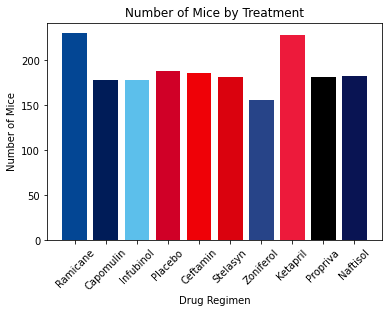

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = clean_mice['Drug Regimen'].unique()
tick_locations = [value for value in x_axis]
plt.bar(x=np.arange(1,11),height=mice_drug, color= drug_colors)
plt.title("Number of Mice by Treatment")
plt.xticks(np.arange(1,11), tick_locations, rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

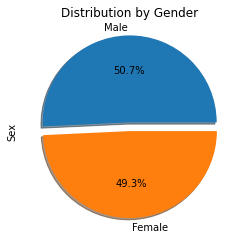

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender = clean_mice["Sex"].value_counts()
mice_gender
mice_gender_chart = mice_gender.plot(kind="pie", title="Distribution by Gender", autopct='%1.1f%%', explode=(0.1,0),shadow=True)

Text(0.5, 1.0, 'Distribution by Gender')

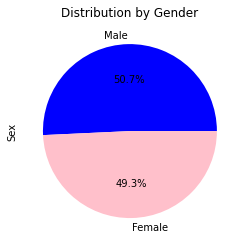

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mice_gender
sex_list = list(gender.index.values)
sex_list
colors = ['blue', 'pink']
plt.pie(gender, labels=sex_list, colors=colors,autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Distribution by Gender")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ['Capomulin', "Ramicane", "Infubinol", "Ceftamin"]
# create datafrare from 4 drug regimen required and group by Mouse ID
regimen = clean_mice[clean_mice["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
regimen
regimen_group = regimen.groupby("Mouse ID")
regimen_max = regimen_group.max()
regimen_max.reset_index(level=0, inplace=True)
regimen_max.head()                    
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,45.466677,1
4,a444,Ramicane,Female,10,25,45,45.000000,0


In [13]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimen_df = regimen_max[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]


tumor_volume = regimen_df['Tumor Volume (mm3)'] 
quartiles =tumor_volume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)    
    # add subset 
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.\n\n")    
    
    # Determine outliers using upper and lower bounds
print(regimen_df)

The lower quartile of Tumor Volume is: 45.5098442875
The upper quartile of Tumor Volume is: 59.930261755000004
The interquartile range of Tumor Volume is: 14.420417467500002
The the median of Tumor Volume is: 46.860058175 
Values below 23.87921808625 could be outliers.
Values above 81.56088795625001 could be outliers.


   Mouse ID Drug Regimen  Tumor Volume (mm3)
0      a203    Infubinol           67.973419
1      a251    Infubinol           65.525743
2      a275     Ceftamin           62.999356
3      a411     Ramicane           45.466677
4      a444     Ramicane           45.000000
..      ...          ...                 ...
95     y769     Ceftamin           68.594745
96     y793    Capomulin           45.000000
97     y865     Ceftamin           64.729837
98     z578     Ramicane           45.000000
99     z581    Infubinol           62.754451

[100 rows x 3 columns]


Text(0, 0.5, 'Tumor Volume(mm3)')

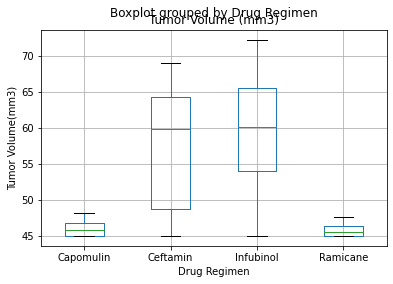

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

regimen_df.boxplot(by="Drug Regimen", column=['Tumor Volume (mm3)'])
plt.ylabel("Tumor Volume(mm3)")

## Line and Scatter Plots

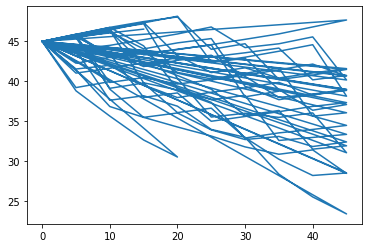

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_scat = clean_mice[clean_mice["Drug Regimen"]== 'Capomulin']
mouse_group =mouse_scat.groupby(['Mouse ID'])
time = mouse_group["Timepoint"]
tumor=mouse_scat['Tumor Volume (mm3)'].values.tolist()
time = mouse_scat.Timepoint.tolist()

plt.plot(time, tumor)
# print(mouse_scat.iloc[:,5])

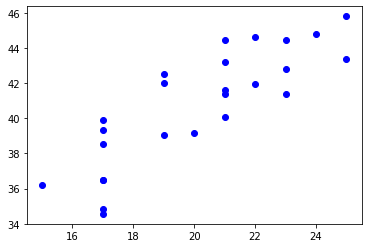

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_weight = mouse_group["Weight (g)"].mean()
tumor_avg = mouse_group["Tumor Volume (mm3)"].mean().round(3)
tumor_avg
plt.scatter(mouse_weight, tumor_avg, facecolors = 'blue')
plt.title = ("Mouse weight Vs Avg. Tumor Volume")
plt.xlabel = ("Mouse Weight")
plt.ylabel = ("Tumor Volume")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


TypeError: 'str' object is not callable

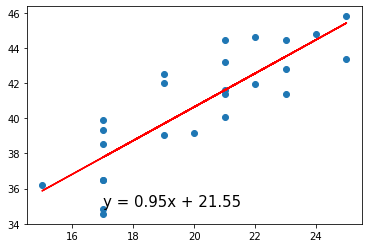

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mouse_weight
y_values = tumor_avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17,35),fontsize=15,color="black")
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
plt.title("Mouse weight & Tumor Volume")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()